# Import the dataset:

In [ ]:
# To install Kaggle CLI
# !pip install kaggle

# Make a directory named “.kaggle”
! mkdir ~/.kaggle

# Upload the json file first,
# Copy the “kaggle.json” into this new directory:
! cp kaggle.json ~/.kaggle/

# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

# Load the dataset
! kaggle datasets download -d andrewmvd/leukemia-classification

# Unzip the dataset
! unzip leukemia-classification.zip


Streaming output truncated to the last 5000 lines.
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_12_5_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_12_6_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_12_7_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_13_1_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_13_2_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_13_3_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_1_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_2_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_3_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_4_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_5_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_6_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/

# First Approach

### Defining Parameters:

In [ ]:
# General Params
MAIN_SEED = 42  # Random Seed

# For first aproach
USE_LESS_DATA = False  # If not enough mem available
LR = 0.01  # Learning Rate
BATCH_SIZE = 32  # Batch Size
EPOCH = 10
IMAGE_RESIZE_X = 200  # Image Width
IMAGE_RESIZE_Y = 200  # Image height
KEEP_COLOR = False  # Keep color in images. Color takes 3x Mem space

### Explore the dataset:

In [ ]:
import os

for dirname, _, filenames in os.walk('/content//C-NMC_Leukemia'):
    for filename in filenames:
        print(dirname)
        print(f"Total number of file in this folder: {len(filenames)} \n")
        break

/content//C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data
Total number of file in this folder: 2586 

/content//C-NMC_Leukemia/training_data/fold_0/hem
Total number of file in this folder: 1130 

/content//C-NMC_Leukemia/training_data/fold_0/all
Total number of file in this folder: 2397 

/content//C-NMC_Leukemia/training_data/fold_1/hem
Total number of file in this folder: 1163 

/content//C-NMC_Leukemia/training_data/fold_1/all
Total number of file in this folder: 2418 

/content//C-NMC_Leukemia/training_data/fold_2/hem
Total number of file in this folder: 1096 

/content//C-NMC_Leukemia/training_data/fold_2/all
Total number of file in this folder: 2457 

/content//C-NMC_Leukemia/validation_data
Total number of file in this folder: 1 

/content//C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data
Total number of file in this folder: 1867 





### Count the images in training:

In [ ]:
total_all_count = 0
total_hem_count = 0
for dirname, _, filenames in os.walk('/content/C-NMC_Leukemia'):
    for filename in filenames:
        all_count = 0
        hem_count = 0
        if "training" in dirname:
            if "all" in dirname:
                all_count = len(filenames)
            elif "hem" in dirname:
                hem_count = len(filenames)
            total_all_count += all_count
            total_hem_count += hem_count
            break
print(f"HEM (Normal) Cell Count {total_hem_count} \n ALL (Leukemia) Cell Count {total_all_count}")

HEM (Normal) Cell Count 3389 
 ALL (Leukemia) Cell Count 7272


### Plot demonstrating graph

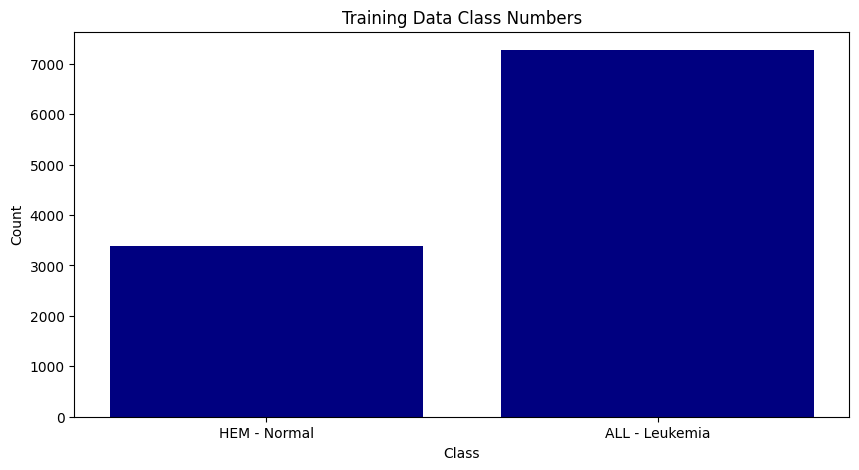

In [ ]:
import matplotlib.pyplot as plt

# Data
data = {'HEM - Normal':total_hem_count, 'ALL - Leukemia':total_all_count}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='navy')

plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Training Data Class Numbers")
plt.show()

As we can see the dataset is not balanced.


### Print some example images:

Text(0.5, 1.0, 'HEM - Normal')

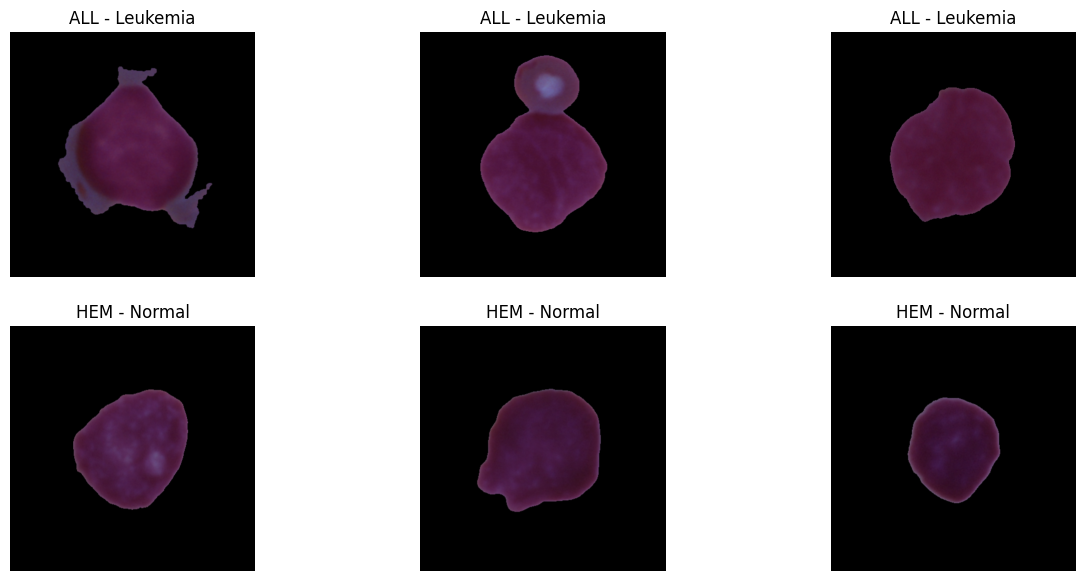

In [ ]:
import cv2 as cv

im1_path = "/content/C-NMC_Leukemia/training_data/fold_1/all/UID_16_29_1_all.bmp"
im2_path = "/content/C-NMC_Leukemia/training_data/fold_1/all/UID_16_13_1_all.bmp"
im3_path = "/content/C-NMC_Leukemia/training_data/fold_1/all/UID_16_11_1_all.bmp"
im4_path = "/content/C-NMC_Leukemia/training_data/fold_1/hem/UID_H10_102_4_hem.bmp"
im5_path = "/content/C-NMC_Leukemia/training_data/fold_1/hem/UID_H10_105_2_hem.bmp"
im6_path = "/content/C-NMC_Leukemia/training_data/fold_1/hem/UID_H10_107_2_hem.bmp"

im1 = cv.imread(im1_path)
im2 = cv.imread(im2_path)
im3 = cv.imread(im3_path)
im4 = cv.imread(im4_path)
im5 = cv.imread(im5_path)
im6 = cv.imread(im6_path)

# Set figure
rows = 2
columns = 3
fig = plt.figure(figsize=(15, 7))

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# im1
plt.imshow(im1)
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# im2
plt.imshow(im2)
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# im3
plt.imshow(im3)
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# im4
plt.imshow(im4)
plt.axis('off')
plt.title('HEM - Normal')

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)

#im4
plt.imshow(im5)
plt.axis('off')
plt.title('HEM - Normal')

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)

#im6
plt.imshow(im6)
plt.axis('off')
plt.title('HEM - Normal')

### Create the training **Dataframe**:

In [ ]:
# Get image paths

training_all_0 = "/content//C-NMC_Leukemia/training_data/fold_0/all/"
training_hem_0 = "/content/C-NMC_Leukemia/training_data/fold_0/hem/"
training_all_1 = "/content/C-NMC_Leukemia/training_data/fold_1/all/"
training_hem_1 = "/content/C-NMC_Leukemia/training_data/fold_1/hem/"
training_all_2 = "/content/C-NMC_Leukemia/training_data/fold_2/all/"
training_hem_2 = "/content/C-NMC_Leukemia/training_data/fold_2/hem/"
validation_data = "/content/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/"

In [ ]:
# Import Train Data

import pandas as pd

image_paths = []
image_labels = []

for data_folder_path in [training_all_0,training_all_1,training_all_2,training_hem_0,training_hem_1,training_hem_2]:
    all_images_in_folder = os.listdir(data_folder_path)
    for image_path in all_images_in_folder:
        image_label = 1 if 'all' in data_folder_path else 0

        image_paths.append(data_folder_path + image_path)
        image_labels.append(image_label)

dict_train = {"image_paths":image_paths, "image_labels":image_labels}
df_train = pd.DataFrame(dict_train)

df_train

,image_paths,image_labels
0,/content//C-NMC_Leukemia/training_data/fold_0/...,1
1,/content//C-NMC_Leukemia/training_data/fold_0/...,1
2,/content//C-NMC_Leukemia/training_data/fold_0/...,1
3,/content//C-NMC_Leukemia/training_data/fold_0/...,1
4,/content//C-NMC_Leukemia/training_data/fold_0/...,1
...,...,...
10656,/content/C-NMC_Leukemia/training_data/fold_2/h...,0
10657,/content/C-NMC_Leukemia/training_data/fold_2/h...,0
10658,/content/C-NMC_Leukemia/training_data/fold_2/h...,0
10659,/content/C-NMC_Leukemia/training_data/fold_2/h...,0


Images in training data:
* 1 for Leukemia (ALL)
* 0 for Normal (HEM)

In [ ]:
df_train['image_labels'].value_counts()

1    7272
0    3389
Name: image_labels, dtype: int64

### Creat the validation **Dataframe**:

In [ ]:
# Get label csv
df_val = pd.read_csv('/content/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')

# Drop Patient_ID column and rename columns
df_val['image_paths'] = df_val['new_names']
df_val['image_labels'] = df_val['labels']
df_val = df_val[['image_paths', 'image_labels']]

# Change image path from relative to full
df_val['image_paths'] = df_val['image_paths'].apply(lambda x: '/content/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/'+x)
df_val

,image_paths,image_labels
0,/content/C-NMC_Leukemia/validation_data/C-NMC_...,1
1,/content/C-NMC_Leukemia/validation_data/C-NMC_...,1
2,/content/C-NMC_Leukemia/validation_data/C-NMC_...,1
3,/content/C-NMC_Leukemia/validation_data/C-NMC_...,0
4,/content/C-NMC_Leukemia/validation_data/C-NMC_...,1
...,...,...
1862,/content/C-NMC_Leukemia/validation_data/C-NMC_...,1
1863,/content/C-NMC_Leukemia/validation_data/C-NMC_...,1
1864,/content/C-NMC_Leukemia/validation_data/C-NMC_...,0
1865,/content/C-NMC_Leukemia/validation_data/C-NMC_...,1


Images in training data:

In [ ]:
df_val['image_labels'].value_counts()

1    1219
0     648
Name: image_labels, dtype: int64

### Shuffle the data:

In [ ]:
df_train = df_train.sample(frac=1, random_state=MAIN_SEED)
df_val = df_val.sample(frac=1, random_state=MAIN_SEED)

df_train

,image_paths,image_labels
6830,/content/C-NMC_Leukemia/training_data/fold_2/a...,1
8600,/content/C-NMC_Leukemia/training_data/fold_1/h...,0
4080,/content/C-NMC_Leukemia/training_data/fold_1/a...,1
3079,/content/C-NMC_Leukemia/training_data/fold_1/a...,1
582,/content//C-NMC_Leukemia/training_data/fold_0/...,1
...,...,...
5734,/content/C-NMC_Leukemia/training_data/fold_2/a...,1
5191,/content/C-NMC_Leukemia/training_data/fold_2/a...,1
5390,/content/C-NMC_Leukemia/training_data/fold_2/a...,1
860,/content//C-NMC_Leukemia/training_data/fold_0/...,1


### Removing Black Areas From Data

Removing black areas will reduce the pixel count we have to deal when training or testing a model. This preprocess has a lot advantages:

* Less memory is needed to load images
* Less features will be extracted to train a model
* Less memory to train model (less model weight number)
* Less irrelevant features so our model will learn faster

### Creat a function to remove the black background

In [ ]:
import numpy as np

def read_and_crop_image(image_path):
    # Read image
    image = cv.imread(image_path)
    # Convert Color System from BGR(Blue, Green, Red) to GRAY
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    # Aplly Otsu's Thresholding
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

    # Apply threshold
    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255]
    (x, y, z_) = np.where(result > 0)
    mnx = (np.min(x))
    mxx = (np.max(x))
    mny = (np.min(y))
    mxy = (np.max(y))

    # Crop Image
    crop_img = image[mnx:mxx,mny:mxy,:]
    #resized_image = cv.resize(crop_img, (IMAGE_RESIZE_X, IMAGE_RESIZE_Y))

    # We can see resizing params as hyperparameters
    # This will determine sample feature count
    # Note: We keep Heigh/Width Ratio by Filling Black
    # Because just resizing will change cell shape structure
    border_v = 0
    border_h = 0
    if (IMAGE_RESIZE_Y/IMAGE_RESIZE_X) >= (crop_img.shape[0]/crop_img.shape[1]):
        border_v = int((((IMAGE_RESIZE_Y/IMAGE_RESIZE_X)*crop_img.shape[1])-crop_img.shape[0])/2)
    else:
        border_h = int((((IMAGE_RESIZE_Y/IMAGE_RESIZE_X)*crop_img.shape[0])-crop_img.shape[1])/2)

    crop_img = cv.copyMakeBorder(crop_img, border_v, border_v, border_h, border_h, cv.BORDER_CONSTANT, 0)
    resized_image = cv.resize(crop_img, (IMAGE_RESIZE_X, IMAGE_RESIZE_Y))

    # Return colorful image if KEEP_COLOR set
    if KEEP_COLOR:
        return resized_image
    else:
        return cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)

    return resized_image

Before crop

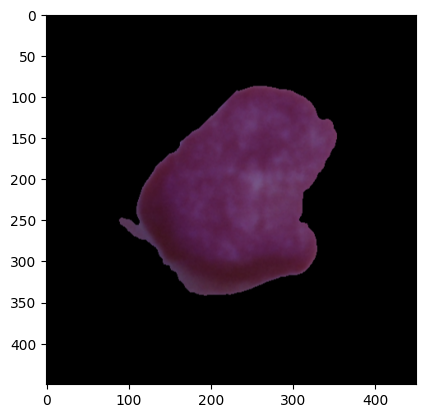

In [ ]:
sample_path = df_train[:1]['image_paths'].values[0]
image = cv.imread(sample_path)
plt.imshow(image)
plt.show()

After crop

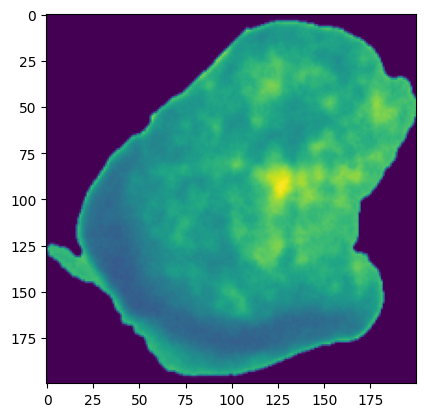

In [ ]:
image = df_train[:1]['image_paths'].apply(read_and_crop_image).values[0]
plt.imshow(image)
plt.show()

### Limit the data if required:

In [ ]:
if USE_LESS_DATA:
    df_train = df_train[:5000]
    df_val = df_val[:1000]

Apply limit preprocess if required

In [ ]:
# Apply Crop preprocess to all df_train and df_val

X_train = df_train['image_paths'].apply(read_and_crop_image).values
X_val = df_val['image_paths'].apply(read_and_crop_image).values

y_train = df_train['image_labels'].values
y_val = df_val['image_labels'].values

# https://stackoverflow.com/a/69873624
X_train = np.stack(X_train, axis=0)
X_val = np.stack(X_val, axis=0)

# Expand dim to add channel info if image has 1 channel(Colorless)
if not KEEP_COLOR:
    X_train = np.expand_dims(X_train, axis=-1)
    X_val = np.expand_dims(X_val, axis=-1)

# Delete non used variables
del(df_train)
del(df_val)

* We split train into train and test in order to get some test data
* If KEEP_COLOR param is True we will see 3 different channels in samples because 3 channels consist from 3 different matris RGB(Red, Green, Blue)
* So shape tells us --> (Sample Size, ImageX, ImageY, ChannelSize)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=MAIN_SEED)

print("X_train ->",X_train.shape,
      "\ny_train ->",y_train.shape,
      "\n\nX_test ->",X_test.shape,
      "\ny_test ->",y_test.shape,
      "\n\nX_val ->",X_val.shape,
      "\ny_val ->",y_val.shape
)

X_train -> (8528, 200, 200, 1) 
y_train -> (8528,) 

X_test -> (2133, 200, 200, 1) 
y_test -> (2133,) 

X_val -> (1867, 200, 200, 1) 
y_val -> (1867,)


### Prepairing Our First Model (CNN):

### Normalize Data

* Standart 8 bit color means pixels has values from 0 to 255. So we use devide by 255 to normalize our features (pixels) from 0 to 1.

In [ ]:
X_train = X_train / 255.0
X_val = X_val / 255.0

In [ ]:
# We set input_shape
if len(X_train.shape) > 3:
    input_shape = X_train.shape[1:]
else:
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
input_shape

(200, 200, 1)

#### Build First Model

* We use basic CNN with L2, Dropout Regularizer. We also use BatchNormalization in our model.
* We need regularizers because in my first tests the model clearly goes overfit. Low val_acc, High train_acc.
* The output shape will be 1 and the last layer uses sigmoid as activation function because the problem we try to solve is binary classification problem.

In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras import datasets, layers, models
from keras.regularizers import l2
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from keras.optimizers import Adam

#CNN
first_model = Sequential()
first_model.add(Conv2D(filters = 2, kernel_size = (3,3),padding = 'same',activation ='relu', input_shape = input_shape))
first_model.add(Conv2D(filters = 4, kernel_size = (3,3),padding = 'same',activation ='relu'))
first_model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'same',activation ='relu'))
first_model.add(MaxPool2D(pool_size=(2,2)))
first_model.add(Dropout(0.5))
first_model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'same',activation ='relu'))
first_model.add(MaxPool2D(pool_size=(2,2)))
first_model.add(Conv2D(filters = 24, kernel_size = (7,7),padding = 'same',activation ='relu'))
first_model.add(Dropout(0.5))

#ANN
first_model.add(Flatten())
first_model.add(Dense(64, kernel_regularizer=l2(1e-5), activation = "relu"))
first_model.add(BatchNormalization())
first_model.add(Dense(32, kernel_regularizer=l2(1e-5), activation = "relu"))
first_model.add(Dense(32, kernel_regularizer=l2(1e-5), activation = "relu"))
first_model.add(Dense(1, activation = "sigmoid"))

* This is our first model summary for first aproach

In [ ]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 2)       20        
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 4)       76        
                                                                 
 conv2d_2 (Conv2D)           (None, 200, 200, 8)       808       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 8)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 8)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 16)      3216      
                                                        

* Train model

In [ ]:
# funcitons to evalute the model
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=LR)
first_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

first_model_trained = first_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs = EPOCH, validation_data = (X_val, y_val))

Epoch 1/10
267/267 [==============================] - 23s 43ms/step - loss: 0.6965 - acc: 0.6760 - f1_m: 0.8018 - precision_m: 0.6801 - recall_m: 0.9875 - val_loss: 0.7729 - val_acc: 0.6529 - val_f1_m: 0.7859 - val_precision_m: 0.6527 - val_recall_m: 1.0000
Epoch 2/10
267/267 [==============================] - 9s 34ms/step - loss: 0.6954 - acc: 0.6798 - f1_m: 0.8062 - precision_m: 0.6801 - recall_m: 0.9990 - val_loss: 0.7187 - val_acc: 0.6529 - val_f1_m: 0.7859 - val_precision_m: 0.6527 - val_recall_m: 1.0000
Epoch 3/10
267/267 [==============================] - 9s 33ms/step - loss: 0.6801 - acc: 0.6805 - f1_m: 0.8069 - precision_m: 0.6804 - recall_m: 1.0000 - val_loss: 0.6892 - val_acc: 0.6529 - val_f1_m: 0.7859 - val_precision_m: 0.6527 - val_recall_m: 1.0000
Epoch 4/10
267/267 [==============================] - 9s 34ms/step - loss: 0.6600 - acc: 0.6805 - f1_m: 0.8071 - precision_m: 0.6805 - recall_m: 1.0000 - val_loss: 0.6856 - val_acc: 0.6529 - val_f1_m: 0.7859 - val_precision_m: 0

In [ ]:
loss, accuracy, f1_score, precision, recall = first_model.evaluate(X_test, y_test, verbose=0)
print(f"loss: {loss}, accuracy: {accuracy}, f1_score: {f1_score}, precision: {precision}, recall: {recall}")

loss: 0.648404598236084, accuracy: 0.688701331615448, f1_score: 0.8132184743881226, precision: 0.6880996823310852, recall: 1.0


The loss and accuracy graphs:

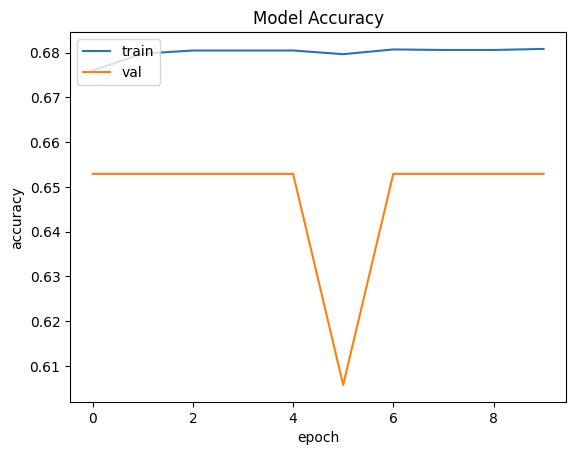

In [ ]:
plt.plot(first_model_trained.history['acc'])
plt.plot(first_model_trained.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

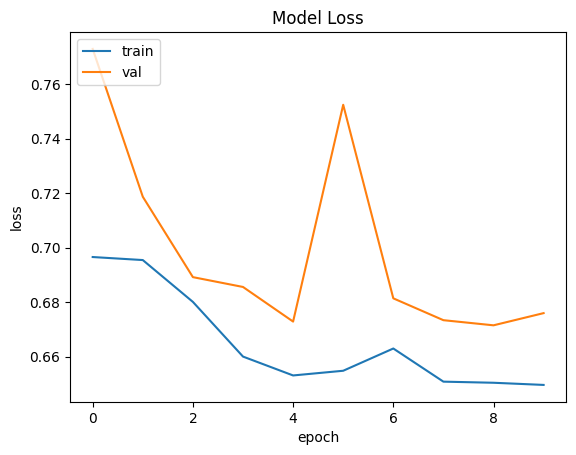

In [ ]:
plt.plot(first_model_trained.history['loss'])
plt.plot(first_model_trained.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

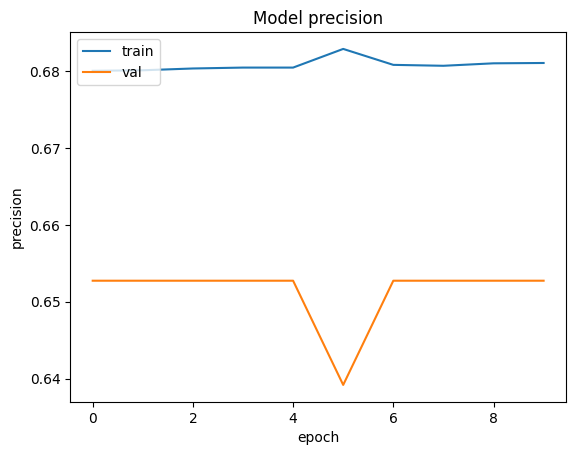

In [ ]:
plt.plot(first_model_trained.history['precision_m'])
plt.plot(first_model_trained.history['val_precision_m'])
plt.title('Model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

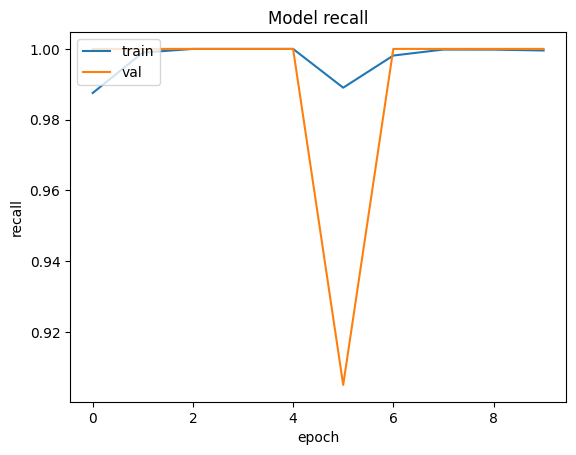

In [ ]:
plt.plot(first_model_trained.history['recall_m'])
plt.plot(first_model_trained.history['val_recall_m'])
plt.title('Model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

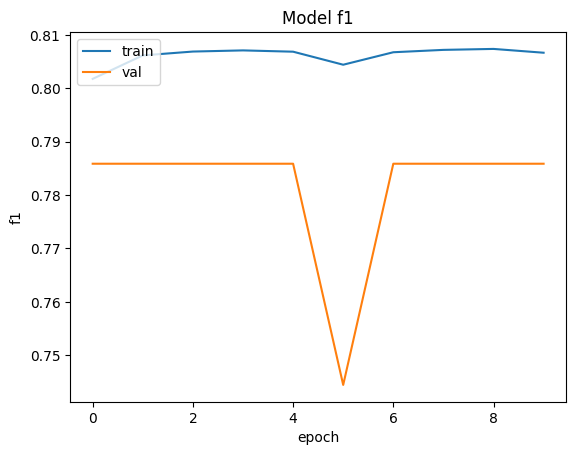

In [ ]:
plt.plot(first_model_trained.history['f1_m'])
plt.plot(first_model_trained.history['val_f1_m'])
plt.title('Model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### The Second Aproach

Here we will use pre-trained model to extract features from images. Then train standart ML models with using the extracted tabular features from images to solve the problem.



Delete non used old variables to save memory

In [ ]:
#del(first_model)
#del(first_model_trained)
del(X_train)
del(X_test)
del(X_val)
del(y_train)
del(y_test)
del(y_val)

In [ ]:
PRETRAINED_MODEL = "ResNet50"  # Can be ResNet50, ResNet101 or VGG19
IMAGE_RESIZE_X = 224  # Image Width
IMAGE_RESIZE_Y = 224  # Image height
KEEP_COLOR = True  # Keep color in images

In [ ]:
# Import Train Data
image_paths = []
image_labels = []
for data_folder_path in [training_all_0,training_all_1,training_all_2,training_hem_0,training_hem_1,training_hem_2]:
    all_images_in_folder = os.listdir(data_folder_path)
    for image_path in all_images_in_folder:
        image_label = 1 if 'all' in data_folder_path else 0

        image_paths.append(data_folder_path + image_path)
        image_labels.append(image_label)

dict_train = {"image_paths":image_paths, "image_labels":image_labels}
df_train = pd.DataFrame(dict_train)

# Shuffle data
df_train = df_train.sample(frac=1, random_state=MAIN_SEED)

# Apply Crop preprocess to all df_train and df_val
X_train = df_train['image_paths'].apply(read_and_crop_image).values
y_train = df_train['image_labels'].values

# https://stackoverflow.com/a/69873624
X_train = np.stack(X_train, axis=0)

# Expand dim to add channel info if image has 1 channel(Colorless)
if not KEEP_COLOR:
    X_train = np.expand_dims(X_train, axis=-1)

# Delete non used variables to gain mem space
del(df_train)

Import pre-trained models

In [ ]:
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50, ResNet101

from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
if PRETRAINED_MODEL == "ResNet50":
    second_model = ResNet50(weights='imagenet',include_top=False, pooling="max")
elif PRETRAINED_MODEL == "ResNet101":
    second_model = ResNet101(weights='imagenet',include_top=False, pooling="max")
else:
    second_model = VGG19(weights='imagenet',include_top=False, pooling="avg")

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
print("X_train ->",X_train.shape,
      "\ny_train ->",y_train.shape,
)

X_train -> (10661, 224, 224, 3) 
y_train -> (10661,)


In [ ]:
# Get image features from pre-trained model

X_train = second_model.predict(X_train)

334/334 [==============================] - 33s 91ms/step


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=MAIN_SEED)

print("X_train ->",X_train.shape,
      "\ny_train ->",y_train.shape,
      "\n\nX_test ->",X_test.shape,
      "\ny_test ->",y_test.shape
)

X_train -> (9594, 2048) 
y_train -> (9594,) 

X_test -> (1067, 2048) 
y_test -> (1067,)


#### Standart ML Model to Process Tabular Features
* First we need to install Lazy Classifier.

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf =   (verbose=0, ignore_warnings=True, custom_metric=None, random_state=MAIN_SEED)
ml_models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [22:26<00:00, 46.43s/it]


* We can print the results

In [ ]:
ml_models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.88,0.82,0.82,0.87,94.63
XGBClassifier,0.86,0.81,0.81,0.86,292.92
LinearDiscriminantAnalysis,0.85,0.81,0.81,0.85,18.73
RidgeClassifierCV,0.85,0.81,0.81,0.85,15.88
RidgeClassifier,0.85,0.81,0.81,0.85,1.46
LGBMClassifier,0.85,0.80,0.80,0.85,44.05
Perceptron,0.83,0.80,0.80,0.83,1.57
LogisticRegression,0.81,0.79,0.79,0.81,3.34
SGDClassifier,0.80,0.78,0.78,0.80,4.93


#### Geting Learning Curve
* Lets implement one of the ML model manually to get the learning curve graph.

In [ ]:
from sklearn.linear_model import RidgeClassifier

rc = RidgeClassifier(random_state=MAIN_SEED)

In [ ]:
# Fit SVC to create learning curve with CV=5
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=rc,
                                                        X=X_train,
                                                        y=y_train,
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        n_jobs=-1)

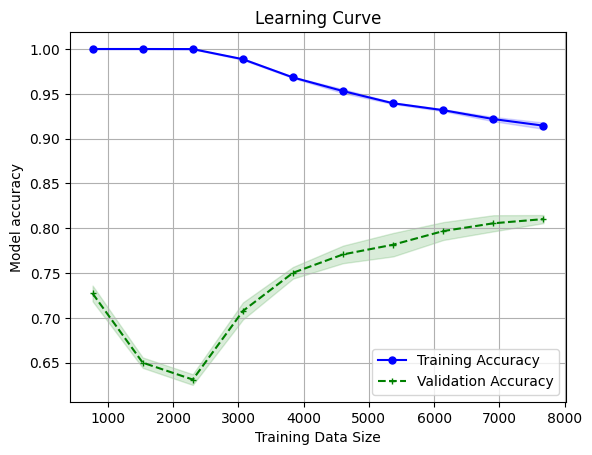

In [ ]:
# Get mean and std values
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### Final Results

As we can see we have achived 0.82 acc with second aproach